# Neural Network Classification                                              

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow as tf

In [3]:
n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.04,
                   random_state=123)

In [4]:
X[:10]

array([[-0.08027435,  1.03268668],
       [-0.83338082,  0.55304951],
       [ 0.80414733,  0.51726934],
       [ 0.43172569,  0.67373476],
       [-0.11905586,  0.98386501],
       [-0.02755454,  0.81063721],
       [-0.5611426 , -0.82154543],
       [ 0.82337212, -0.47046276],
       [ 0.53069978, -0.60074366],
       [ 0.9259807 , -0.24061407]])

In [5]:
y[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [9]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})
circles.head()

,X0,X1,label
0,-0.080274,1.032687,0
1,-0.833381,0.553050,0
2,0.804147,0.517269,0
3,0.431726,0.673735,1
4,-0.119056,0.983865,0


In [10]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

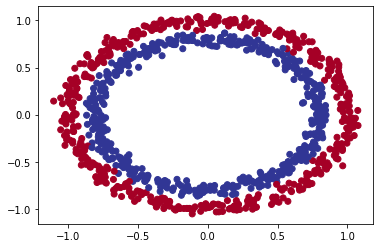

In [13]:
plt.scatter(circles['X0'],circles['X1'], c=circles['label'], cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [18]:
X.shape, y.shape

((1000, 2), (1000,))

## Modelling Steps

In [17]:
tf.random.set_seed(123)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_1.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 2ms/step - loss: 5.7325 - accuracy: 0.4670
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.0897 - accuracy: 0.4440
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8536 - accuracy: 0.4590
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.3885 - accuracy: 0.4730
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 2.8225 - accuracy: 0.4860
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.4940
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.4940
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5040
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4990
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5030


In [20]:
model_1.fit(X,y,epochs=100, verbose=0)

In [22]:
model_1.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.4690


[0.6931897401809692, 0.4690000116825104]

In [24]:
tf.random.set_seed(123)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model_2.fit(X,y,epochs=50, verbose =0)

In [26]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.4810


[0.7106294631958008, 0.48100000619888306]

In [63]:
def plot_decision_boundary(model, X,y):
  """
  Plots the decision boundary create by a model predicting on X
  """
   # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     


313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


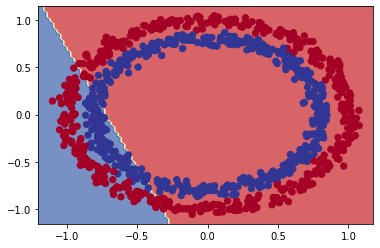

In [30]:
plot_decision_boundary(model_1,X,y)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


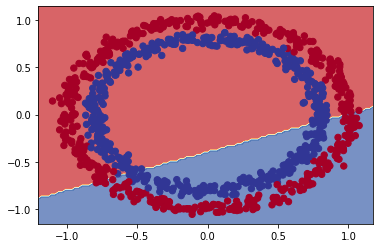

In [31]:
plot_decision_boundary(model_2,X,y)

In [32]:
tf.random.set_seed(123)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(X,y,epochs=100, verbose=0)

In [33]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.5490


[0.6811153888702393, 0.5490000247955322]

313/313 [==============================] - 2s 7ms/step
doing binary classifcation...


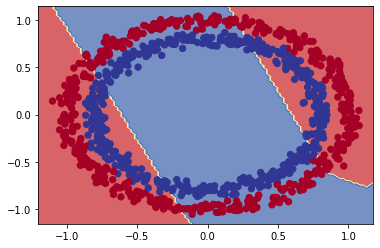

In [34]:
plot_decision_boundary(model_3,X,y)

In [37]:
tf.random.set_seed(123)

model_4 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(X,y,epochs=100, verbose=0)

In [38]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


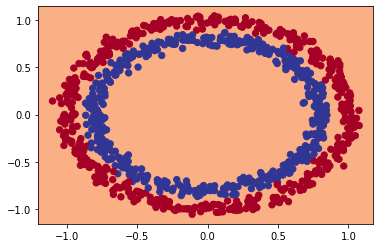

In [39]:
plot_decision_boundary(model_4, X,y)

In [40]:
tf.random.set_seed(123)

model_5 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(10,activation ='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(X,y, epochs=100, verbose=0)

In [41]:
model_5.evaluate(X,y)

32/32 [==============================] - 1s 9ms/step - loss: 0.2096 - accuracy: 0.9820


[0.20958475768566132, 0.9819999933242798]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


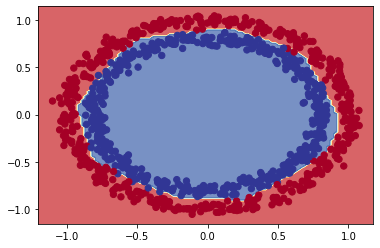

In [42]:
plot_decision_boundary(model_5,X,y)

## Improving and Evaluating the model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
tf.random.set_seed(123)

model_6 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_6 = model_6.fit(X_train,y_train,epochs=100,verbose=0)

In [50]:
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 1s 11ms/step - loss: 0.0766 - accuracy: 0.9750


[0.07657069712877274, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


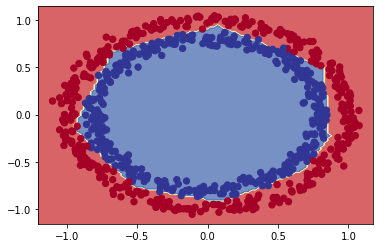

In [64]:
plot_decision_boundary(model_6,X_train,y_train)

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


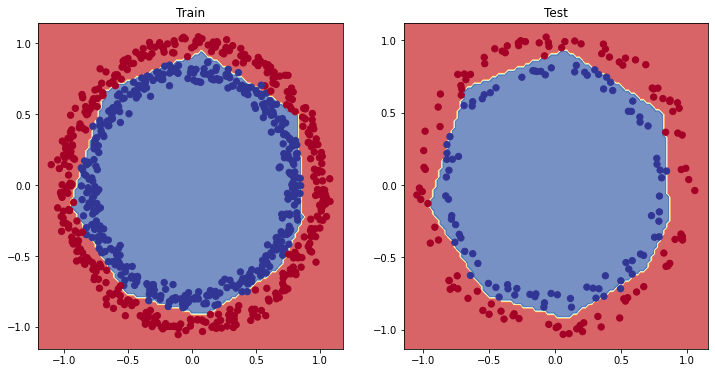

In [74]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show()

<AxesSubplot:>

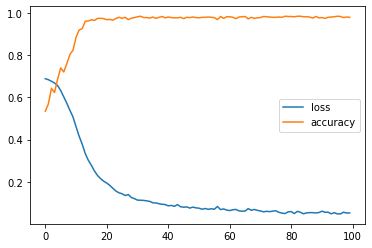

In [77]:
pd.DataFrame(history_6.history).plot()

In [86]:
tf.random.set_seed(123)

model_7 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_7 = model_7.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=0,
                        callbacks=[lr_scheduler])

In [87]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9425 - accuracy: 0.4550


[0.9425337314605713, 0.45500001311302185]

<AxesSubplot:xlabel='epochs'>

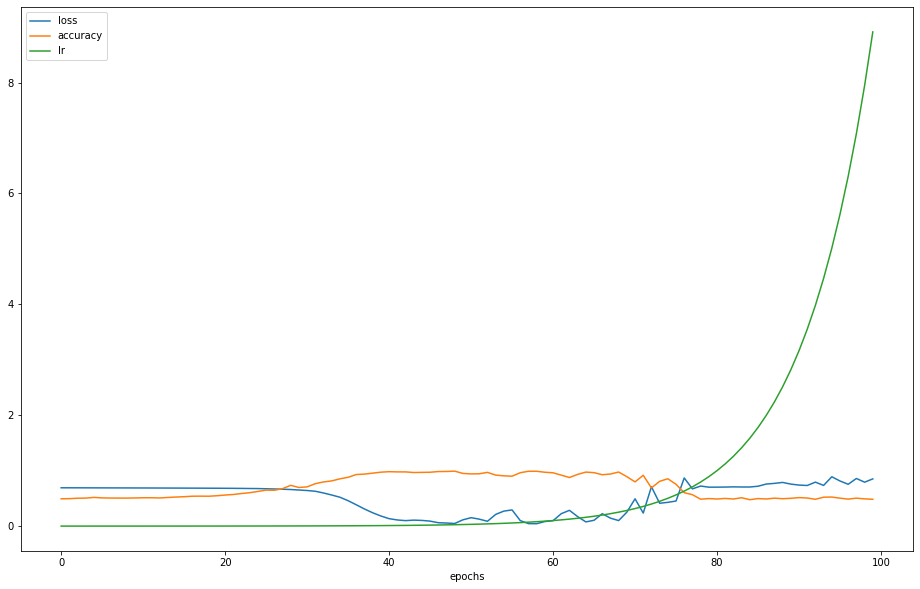

In [88]:
pd.DataFrame(history_7.history).plot(figsize=(16,10), xlabel='epochs')

Text(0.5, 1.0, 'learning rate vs loss')

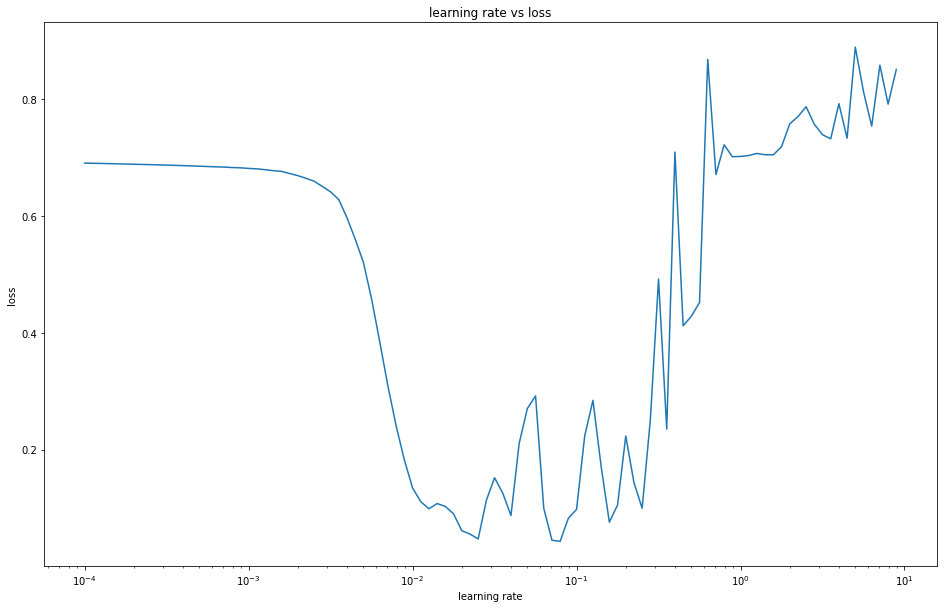

In [90]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(16,10))
plt.semilogx(lrs,history_7.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [91]:
tf.random.set_seed(123)

model_8 = tf.keras.Sequential([
    tf.keras.Input(shape=[2]),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history_8 = model_8.fit(X_train,y_train,epochs=50)


Epoch 1/50
25/25 [==============================] - 2s 3ms/step - loss: 0.6944 - accuracy: 0.5188
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5437
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6012
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.7563
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8350
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.9525
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9563
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.9825
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9725
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9850
Epoch 11/50
25/25 [

In [92]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.9900


[0.0298809465020895, 0.9900000095367432]

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


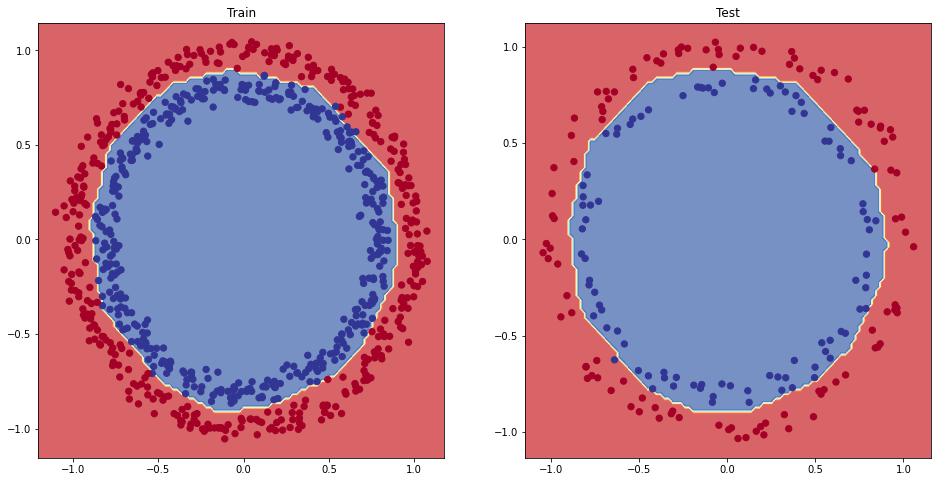

In [94]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
y_preds = model_8.predict(X_test)
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: ignored

In [99]:
y_preds[:5]

array([[6.1480037e-08],
       [8.7336117e-01],
       [1.3579433e-05],
       [9.9178779e-01],
       [9.8560399e-01]], dtype=float32)

In [100]:
y_test[:5]

array([0, 1, 0, 1, 1])

In [101]:
confusion_matrix(y_test, tf.round(y_preds))

array([[108,   1],
       [  1,  90]])

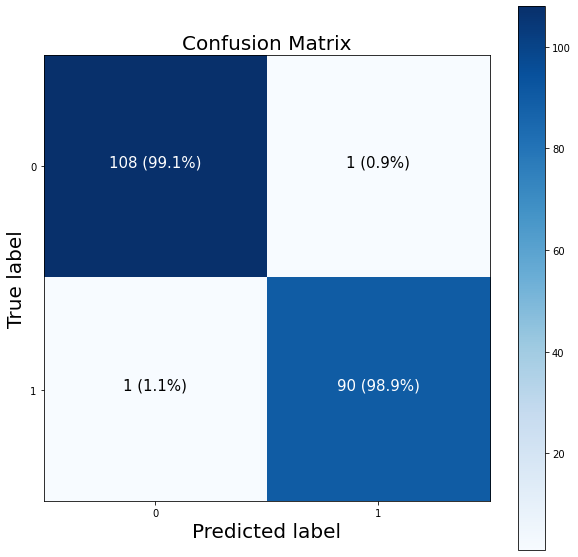

In [102]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
     